# Customer Churn Prediction 
 - 

In [1]:
# Importing necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Read the data

data = pd.read_csv("Churn_Modelling.csv")

## Step 1 : Data Understanding

 - Dataframe Shape
 - Head and Tail
 - dtypes
 - describe

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.shape

(10000, 14)

In [5]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
# overall statistics
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Step 2 : Data Preperation

 - Dropping irrelevant Columns and rows
 - Identifying Duplicated Columns
 - Renaming Columns
 - Feature Creation

In [9]:
#drop customer Id, RowNumber, Surname
data.drop(['CustomerId','RowNumber','Surname'],axis=1, inplace = True)

In [10]:
# Identifying Duplicated Columns
duplicates = data.duplicated()
duplicates.sum()

0

In [11]:
# Renaming Columns
data = data.rename(columns={'Exited': 'Churn'})

In [12]:
# Feature creation - Label Encoding 
data = pd.get_dummies(data, drop_first = True)
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


## Step 3 : Feature Understanding

 - Plotting Feature Distribution
     - Countplot
     - Histogram
     - KDE

In [13]:
data['Churn'].value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

/Users/rasna/Python/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

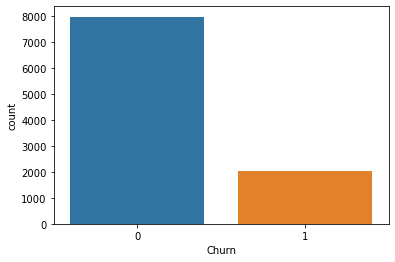

In [14]:
sns.countplot(data['Churn'])

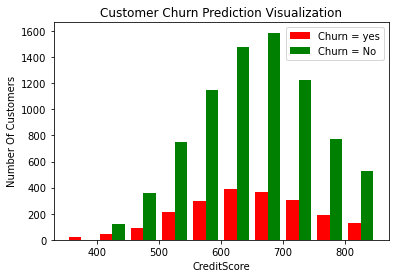

In [15]:
# Histogram on Creditscore
CreditScore_churn_no = data[data.Churn == 0].CreditScore
CreditScore_churn_yes = data[data.Churn == 1].CreditScore

plt.xlabel('CreditScore')
plt.ylabel("Number Of Customers")
plt.title('Customer Churn Prediction Visualization')


plt.hist([CreditScore_churn_yes, CreditScore_churn_no], color=['red','green'], label=['Churn = yes', 'Churn = No'])
plt.legend()

## Step 4 : Feature relationships

 - Scatterplot
 - Heatmap Correlation
 - Pairplot
 - Groupby Comparison

In [56]:

data1 = data[['Age','Tenure','CreditScore','Balance','NumOfProducts','EstimatedSalary']]
data1.head()

,Age,Tenure,CreditScore,Balance,NumOfProducts,EstimatedSalary
0,42,2,619,0.00,1,101348.88
1,41,1,608,83807.86,1,112542.58
2,42,8,502,159660.80,3,113931.57
3,39,1,699,0.00,2,93826.63
4,43,2,850,125510.82,1,79084.10


<AxesSubplot:>

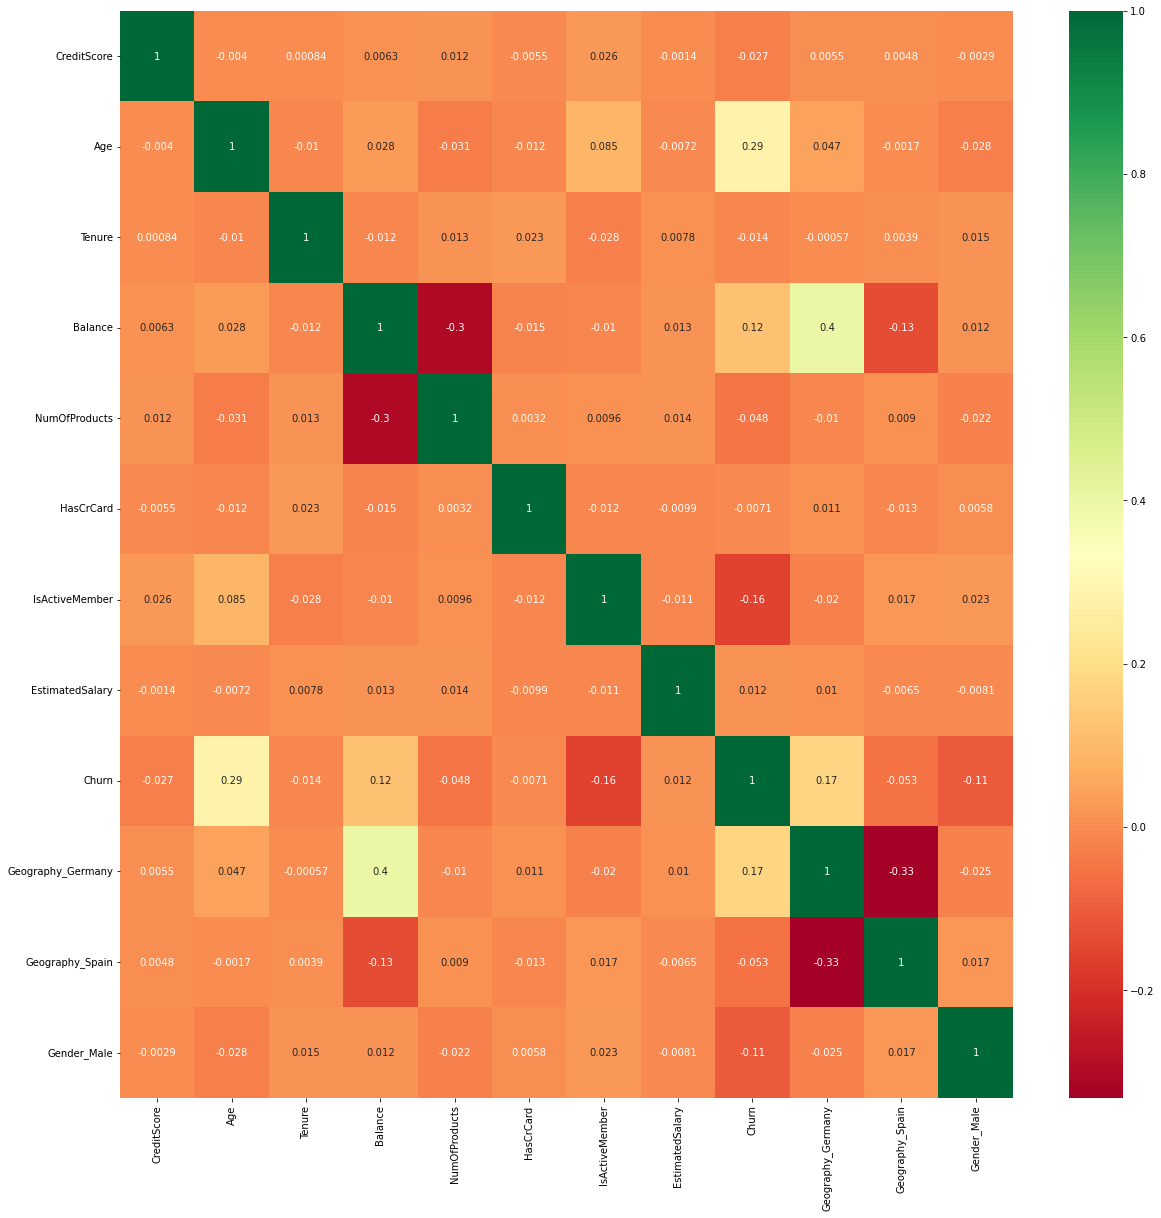

In [58]:
# Heatmap
#data1 = data['Age','Tenure','CreditScore','Balance','NumOfProducts','EstimatedSalary']
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (20,20))
sns.heatmap(data[top_corr_features].corr(),annot=True, cmap = 'RdYlGn')

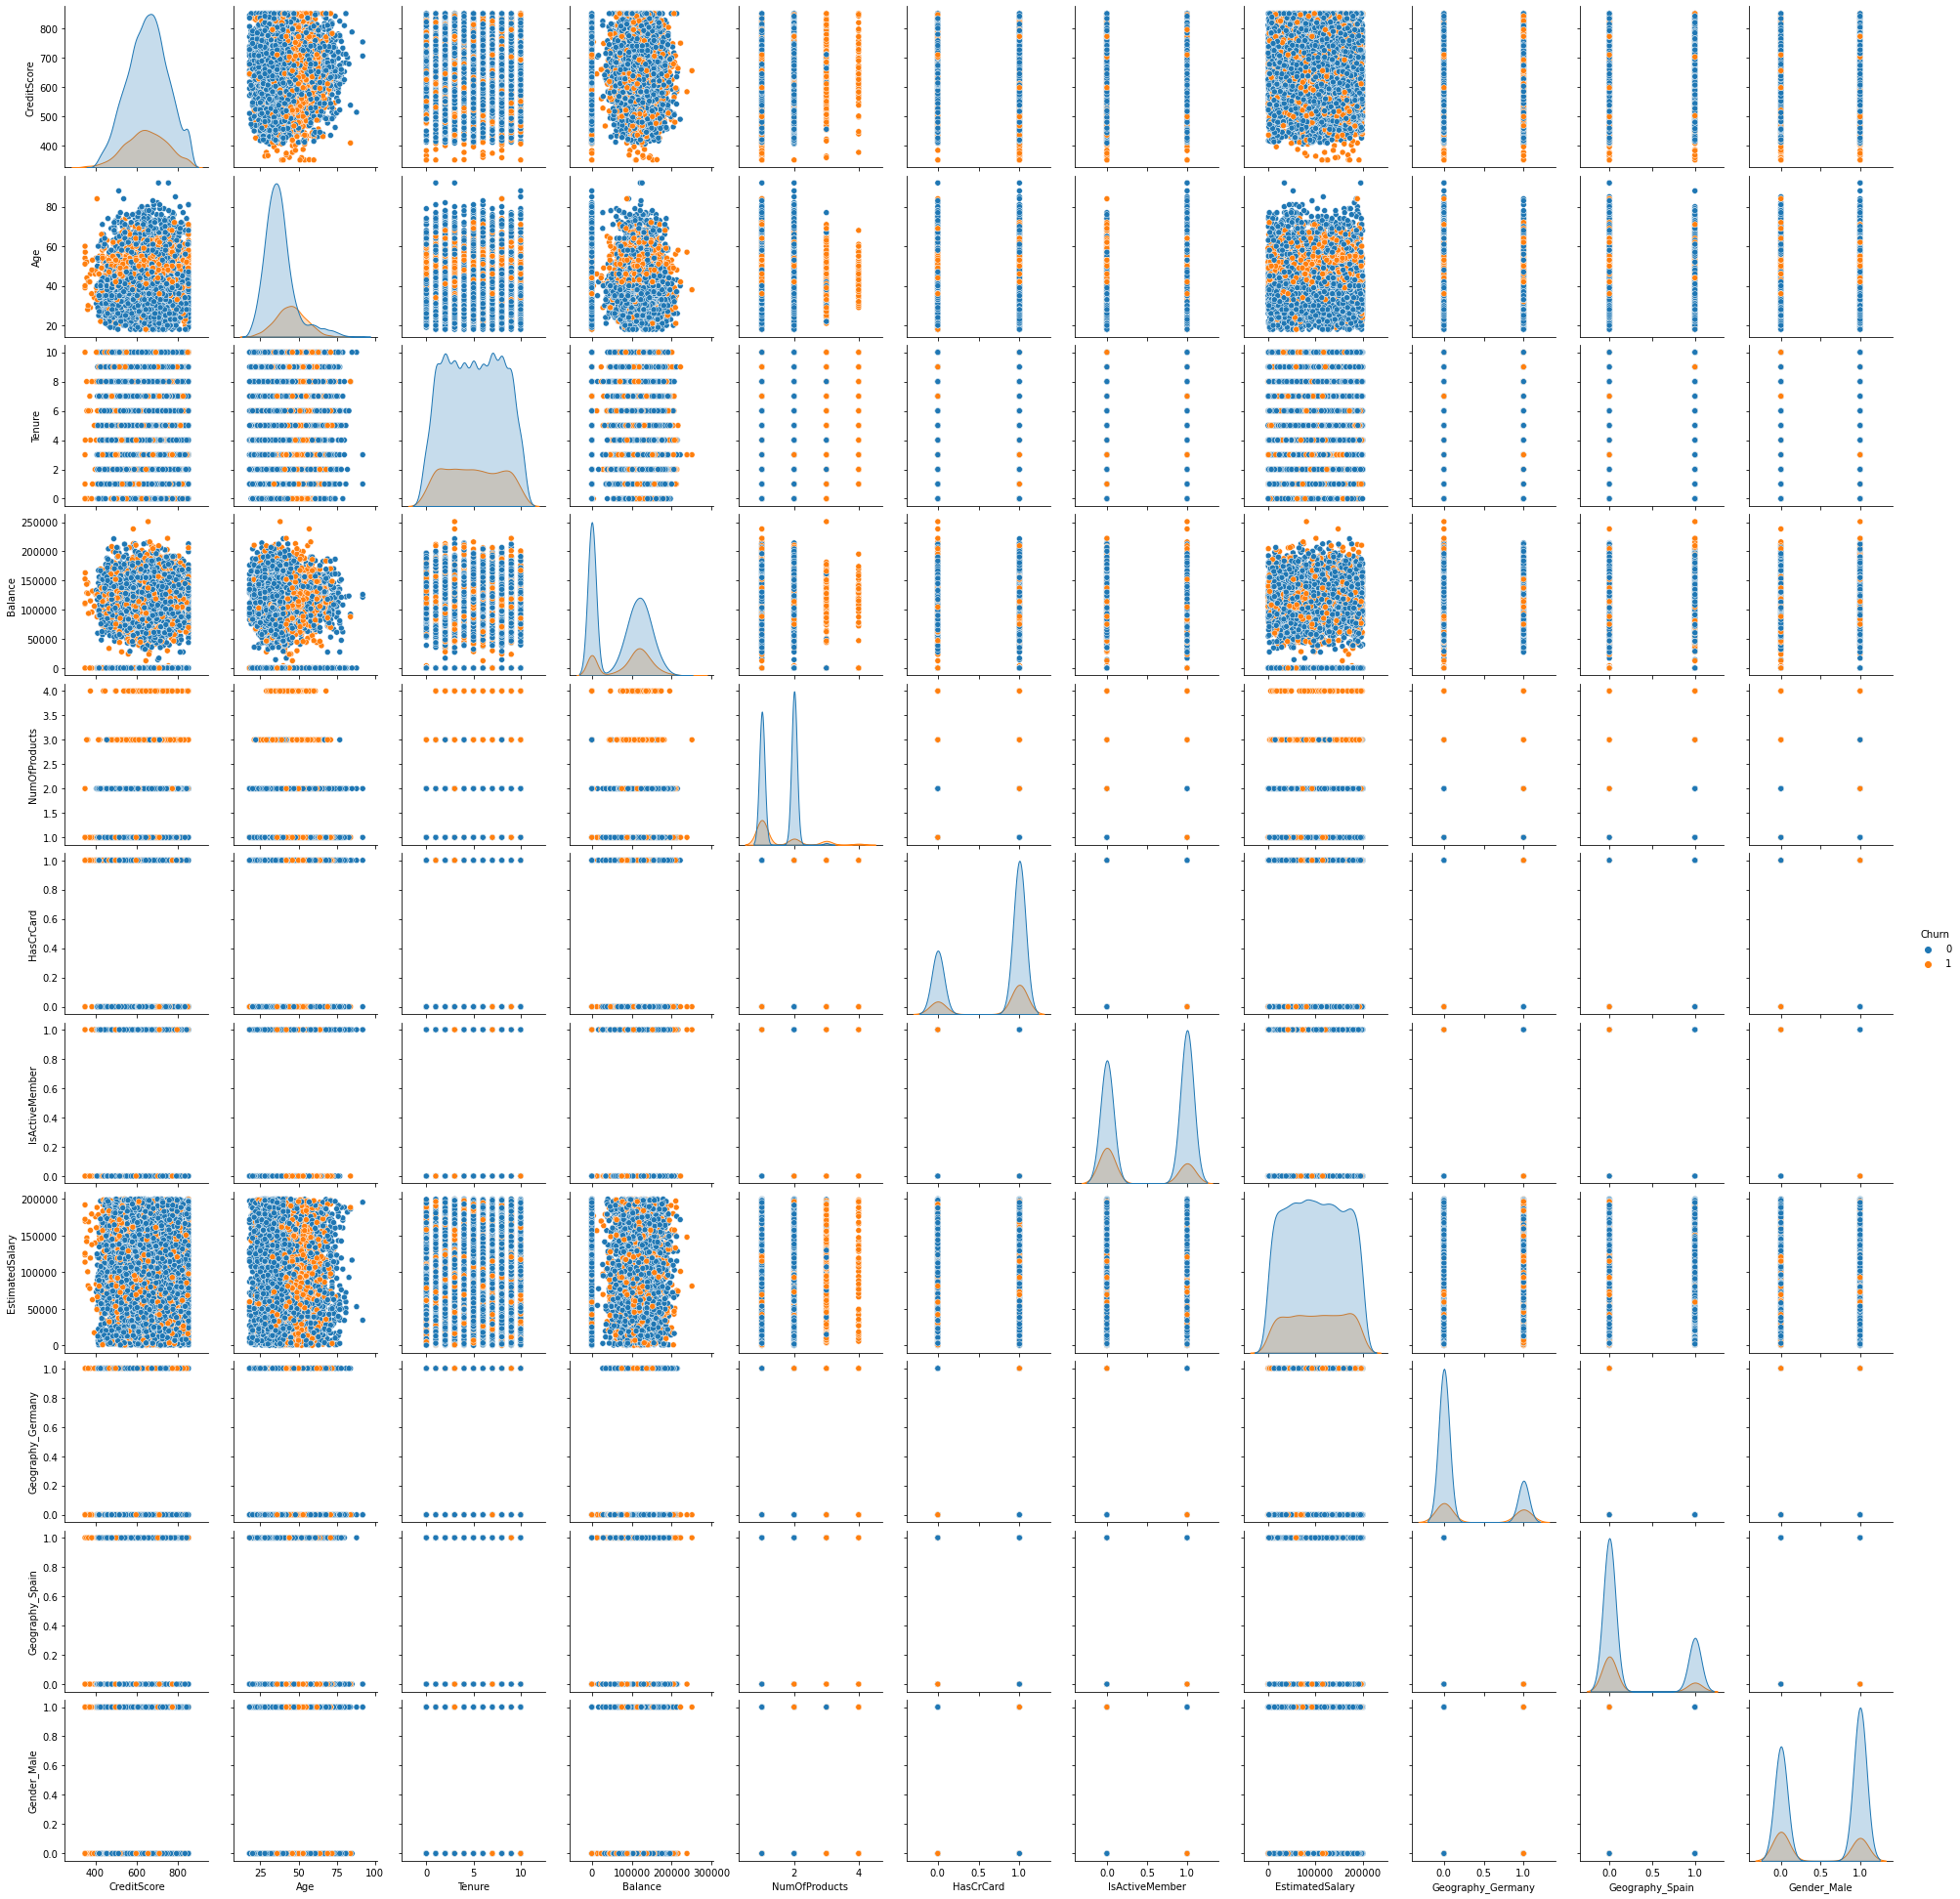

In [17]:
# Pairplot
sns.pairplot(data, hue = 'Churn')

# Model Creation

In [18]:
# Import all the necessary libraries

from sklearn.model_selection import train_test_split       
from sklearn.preprocessing import StandardScaler           # Standard Scalar
from sklearn.metrics import accuracy_score                 # Accuracy Score
from sklearn.ensemble import RandomForestClassifier        # Random Forest Classifier
from sklearn.linear_model import LogisticRegression        # Logistic Regression
from sklearn.tree import DecisionTreeClassifier            # Decision Tree Classifier
from sklearn.svm import SVC                                # Support Vector Machine
from sklearn.neighbors import KNeighborsClassifier         # K-Nearest neighbor
from sklearn.metrics import confusion_matrix               # Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay         # Plot Confusion Matrix
from sklearn.metrics import classification_report          # Classification Report

In [19]:
# split the dataset

X = data.drop('Churn', axis=1)   # independant variable
y = data['Churn']                # dependant variable 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Scaling

In [20]:
# Standerdising the dataset

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [3]:
X_train.head

NameError: name 'X_train' is not defined

## Random Forest

In [21]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
a = accuracy_score(y_test, y_pred)
print("Accuracy Score :", a*100, "%")

Accuracy Score : 86.8 %


In [22]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1551   56]
 [ 208  185]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.86      2000



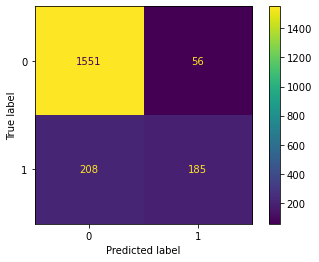

In [23]:
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf.classes_)
disp.plot()
plt.show()

## Logistic Regression

In [24]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
b = accuracy_score(y_test, y_pred)
print("Accuracy Score :", b*100, "%")

Accuracy Score : 81.10000000000001 %


In [25]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1543   64]
 [ 314   79]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



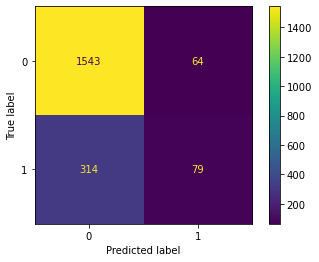

In [26]:
cm = confusion_matrix(y_test, y_pred, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lr.classes_)
disp.plot()
plt.show()

## Decision Tree

In [27]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
c = accuracy_score(y_test, y_pred)
print("Accuracy Score :", c*100, "%")

Accuracy Score : 77.95 %


In [28]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1362  245]
 [ 196  197]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1607
           1       0.45      0.50      0.47       393

    accuracy                           0.78      2000
   macro avg       0.66      0.67      0.67      2000
weighted avg       0.79      0.78      0.78      2000



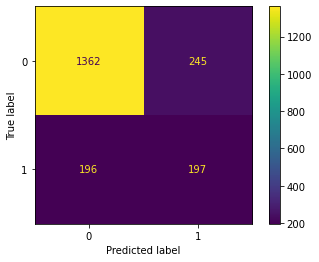

In [29]:
cm = confusion_matrix(y_test, y_pred, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=dt.classes_)
disp.plot()
plt.show()

## SVM

In [30]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
d= accuracy_score(y_test, y_pred)
print("Accuracy Score :", d*100, "%")

Accuracy Score : 85.6 %


In [31]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1562   45]
 [ 243  150]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.77      0.38      0.51       393

    accuracy                           0.86      2000
   macro avg       0.82      0.68      0.71      2000
weighted avg       0.85      0.86      0.84      2000



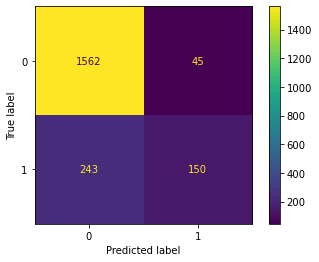

In [32]:
cm = confusion_matrix(y_test, y_pred, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=svm.classes_)
disp.plot()
plt.show()

## KNN

In [33]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
e = accuracy_score(y_test, y_pred)
print("Accuracy Score :", e*100, "%")

Accuracy Score : 83.2 %


In [34]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1496  111]
 [ 225  168]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1607
           1       0.60      0.43      0.50       393

    accuracy                           0.83      2000
   macro avg       0.74      0.68      0.70      2000
weighted avg       0.82      0.83      0.82      2000



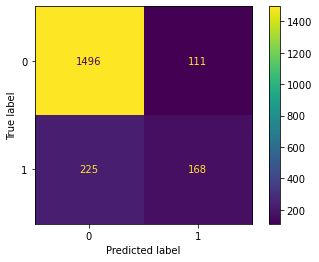

In [35]:
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=knn.classes_)
disp.plot()
plt.show()

In [36]:
Final_Score = pd.DataFrame({'Models':['RF','LR','DT','SVM','KNN'],
                          'Accuracy_Score':[a,b,c,d,e]})
Final_Score

,Models,Accuracy_Score
0,RF,0.8680
1,LR,0.8110
2,DT,0.7795
3,SVM,0.8560
4,KNN,0.8320


## Confusion Matrix

In [37]:
print(confusion_matrix(y_test,y_pred))

[[1496  111]
 [ 225  168]]


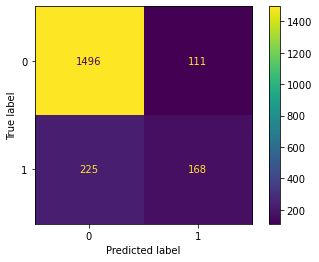

In [38]:
cm = confusion_matrix(y_test, y_pred, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=svm.classes_)
disp.plot()
plt.show()

# SMOTE

In [39]:
from imblearn.over_sampling import SMOTE

In [40]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [41]:
y_res.value_counts()

1    7963
0    7963
Name: Churn, dtype: int64

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [43]:
# Feature scaling 

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [44]:
# Random Forest

rf.fit(X_train,y_train)
y_pred = lr.predict(X_test)

a = accuracy_score(y_test, y_pred)
print("Accuracy Score :", a*100, "%")

Accuracy Score : 56.528562460765855 %


In [45]:
#Logistic Regression

lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

b = accuracy_score(y_test, y_pred)
print("Accuracy Score :", b*100, "%")

Accuracy Score : 78.3427495291902 %


In [46]:
# Decision Tree

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

c = accuracy_score(y_test, y_pred)
print("Accuracy Score :", c*100, "%")

Accuracy Score : 79.66101694915254 %


In [47]:
# SVM

svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

d = accuracy_score(y_test, y_pred)
print("Accuracy Score :", d*100, "%")

Accuracy Score : 84.02385436283741 %


In [48]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1365  268]
 [ 241 1312]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1633
           1       0.83      0.84      0.84      1553

    accuracy                           0.84      3186
   macro avg       0.84      0.84      0.84      3186
weighted avg       0.84      0.84      0.84      3186



In [49]:
Final_Score = pd.DataFrame({'Models':['LR','SVM','DT','RF'],
                          'Accuracy_Score':[a,b,c,d]})



In [50]:
Final_Score

,Models,Accuracy_Score
0,LR,0.565286
1,SVM,0.783427
2,DT,0.796610
3,RF,0.840239
